# 为什么要先学习数学中的导数与偏导数 其中梯度与均方差和激活函数在机器学习中的作用是什么？

导数和偏导数是理解梯度下降法的基础，而梯度下降是优化模型参数的关键方法。

## 导数与偏导数的核心作用
导数是函数在某一点沿单一方向的变化率，而偏导数用于多元函数中某一变量的局部变化率。它们是理解优化算法的核心工具。例如，在梯度下降法中，导数用于计算损失函数随参数变化的斜率，指导参数调整方向。偏导数则允许在多个参数（如神经网络的权重）中独立分析每个变量对输出的影响，为多变量优化提供数学支撑。
### 实际应用场景
线性回归：通过计算损失函数（如均方差）对权重和偏置的偏导数，逐步迭代优化模型参数。

反向传播：神经网络中链式法则依赖偏导数，逐层计算各权重的梯度以更新参数

# 梯度
## 梯度的定义与意义
梯度是由多元函数各参数的偏导数组成的向量，指向函数值增长最快的方向，模长表示变化率的最大值。在机器学习中，梯度下降法通过沿负梯度方向更新参数，逐步逼近损失函数的最小值。
## 梯度在优化中的关键角色
梯度下降算法：如随机梯度下降（SGD）及其变种（Adam、RMSprop），通过计算损失函数的梯度调整参数，解决线性回归、神经网络等模型的训练问题。

梯度提升算法：通过拟合残差的负梯度，逐步构建强学习器（如GBDT），提升模型的预测能力


# 什么是导数？

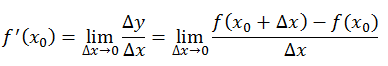

反映的是函数y=f(x)在某一点处沿x轴正方向的变化率。再强调一遍，是函数f(x)在x轴上某一点处沿着x轴正方向的变化率/变化趋势。直观地看，也就是在x轴上某一点处，如果f’(x)>0，说明f(x)的函数值在x点沿x轴正方向是趋于增加的；如果f’(x)<0，说明f(x)的函数值在x点沿x轴正方向是趋于减少的。

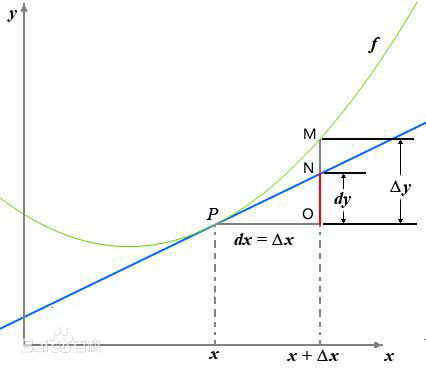

这里补充上图中的Δy、dy等符号的意义及关系如下：

　Δx：x的变化量；
 
　dx：x的变化量Δx趋于0时，则记作微元dx；
 
　Δy：Δy=f(x0+Δx)-f(x0)，是函数的增量；
 
　dy：dy=f’(x0)dx，是切线的增量；
 
　当Δx→0时，dy与Δy都是无穷小，dy是Δy的主部，即Δy=dy+o(Δx).

## 导数和偏导数

 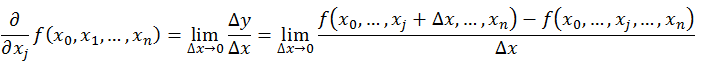

导数与偏导数本质是一致的，都是当自变量的变化量趋于0时，函数值的变化量与自变量变化量比值的极限。直观地说，偏导数也就是函数在某一点上沿坐标轴正方向的的变化率。

导数，指的是一元函数中，函数y=f(x)在某一点处沿x轴正方向的变化率；
偏导数，指的是多元函数中，函数y=f(x1,x2,…,xn)在某一点处沿某一坐标轴（x1,x2,…,xn）正方向的变化率。

# 总结
### 数学工具的整体关联
导数与梯度：梯度是导数的推广，通过偏导数组合实现多参数优化。

梯度与激活函数：激活函数的导数（如ReLU的阶跃特性）影响反向传播中梯度的稳定性，进而决定训练效率。
### 实际案例
神经网络训练：反向传播依赖链式法则计算梯度，激活函数决定非线性映射能力。

模型调优：通过分析损失函数的梯度，调整学习率或选择优化器（如Adam），加速收敛。



In [5]:
import torch
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei', 'SimHei']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示异常

# 1. PyTorch自动求导

In [9]:
# 定义函数 f(x) = x^3 - 4x -5
x = torch.tensor(2.0, requires_grad=True)# requires_grad意味着x需要求导，需要梯度信息
y = x**3 - 4*x -5

# 什么参数要求导，为什么

在机器学习中，参数求导是实现模型优化的核心步骤，其目标是通过梯度信息调整参数以最小化损失函数。以下是需要求导的参数类别及其原因分析：

---

### 一、需要求导的参数类别
1. **模型权重（Weights）**  
   包括线性回归中的权重向量、神经网络中的连接权重矩阵等。权重决定了特征对预测结果的贡献程度。通过求导可计算损失函数对权重的梯度，指导参数向损失减小的方向更新。  
   **示例**：线性回归模型 \( y = WX + b \) 中的 \( W \)，需计算 \( \frac{\partial L}{\partial W} \) 以调整权重矩阵。

2. **偏置项（Bias）**  
   如线性模型中的截距项 \( b \)、神经网络各层的偏置向量。偏置调整模型的整体输出偏移量，其梯度计算直接影响模型对数据的拟合能力。  
   **示例**：损失函数 \( L = \frac{1}{N}\sum (y_{\text{pred}} - y_{\text{true}})^2 \) 对 \( b \) 的导数 \( \frac{\partial L}{\partial b} \) 用于优化偏置。

3. **激活函数的可学习参数**  
   某些激活函数（如Leaky ReLU中的斜率参数 \( \alpha \)、参数化激活函数中的阈值）需要根据数据特性动态调整。这类参数的导数可通过反向传播计算，实现端到端优化。  
   **示例**：Leaky ReLU函数 \( f(z) = \alpha z \)（当 \( z < 0 \) 时）中的 \( \alpha \)，需优化以缓解梯度消失问题。

4. **正则化项中的权重参数**  
   在L1/L2正则化中，正则化系数 \( \lambda \) 通常作为超参数固定，但在某些场景下（如自适应正则化）会被视为可学习参数，需通过求导调整其对模型复杂度的约束强度。

---

### 二、需要求导的根本原因
1. **优化算法依赖梯度信息**  
   梯度下降法、Adam等优化算法依赖参数的导数确定更新方向。例如，梯度方向指示损失函数下降最快的路径，学习率控制步长，共同驱动参数向最优解逼近。  
   **数学表达**：参数更新规则为 \( \theta_{\text{new}} = \theta_{\text{old}} - \eta \cdot \nabla_\theta L \)，其中 \( \eta \) 为学习率，\( \nabla_\theta L \) 为梯度。

2. **模型非线性特性的表达**  
   神经网络通过激活函数引入非线性，但其导数（如ReLU的导数为分段常数）影响反向传播中梯度的稳定性。若激活函数不可导（如ReLU在零点），需采用次梯度或近似方法。

3. **损失函数与参数的关联性**  
   损失函数（如均方差、交叉熵）直接衡量模型预测与真实值的差异。通过链式法则计算复合函数（损失函数→预测输出→模型参数）的导数，可量化参数对预测误差的影响。  
   **反向传播示例**：  
   \[
   \frac{\partial L}{\partial W} = \frac{\partial L}{\partial y_{\text{pred}}} \cdot \frac{\partial y_{\text{pred}}}{\partial W}
   \]

4. **正则化与泛化能力平衡**  
   正则化项的导数（如L2正则化的梯度为 \( 2\lambda W \)）影响参数更新幅度，防止过拟合。通过调整正则化梯度权重，可在模型复杂度和泛化性之间取得平衡。

---

### 三、无需求导的参数与例外情况
1. **超参数（学习率、迭代次数）**  
   学习率 \( \eta \)、批量大小等超参数通常手动设定或通过网格搜索优化，不参与梯度计算。

2. **固定结构的参数**  
   部分模型（如预训练模型的冻结层）在迁移学习中保持参数固定，其导数计算被跳过以节省计算资源。

3. **特定场景下的例外**  
   • **元学习（Meta-Learning）**：二阶导数用于优化超参数。
   • **贝叶斯方法**：通过概率分布而非梯度更新参数，但计算复杂度较高。

---

### 四、实际应用中的注意事项
1. **梯度爆炸与消失**  
   深度网络中链式求导可能导致梯度异常。解决方案包括梯度裁剪、使用ReLU等激活函数。

2. **计算图与自动微分**  
   现代框架（如PyTorch、TensorFlow）通过动态计算图自动追踪求导过程，开发者需关注张量的 `requires_grad` 属性设置。

3. **硬件加速与分布式训练**  
   大规模参数求导需结合GPU/TPU并行计算，框架如DeepSpeed支持分布式梯度聚合。

---

### 总结
需要求导的参数主要包括模型权重、偏置和部分可学习的函数参数，其核心目的是通过梯度信息优化模型性能。求导过程将数学原理（如链式法则、矩阵运算）与工程实践（如自动微分、硬件加速）紧密结合，是机器学习模型从理论到落地的关键桥梁。

In [10]:
# 反向传播计算梯度
y.backward()
print(f"x=2时导数：{x.grad.item()}")  # 输出：3x²-4 → 8.0

x=2时导数：8.0


# 2 函数与导数图像对比

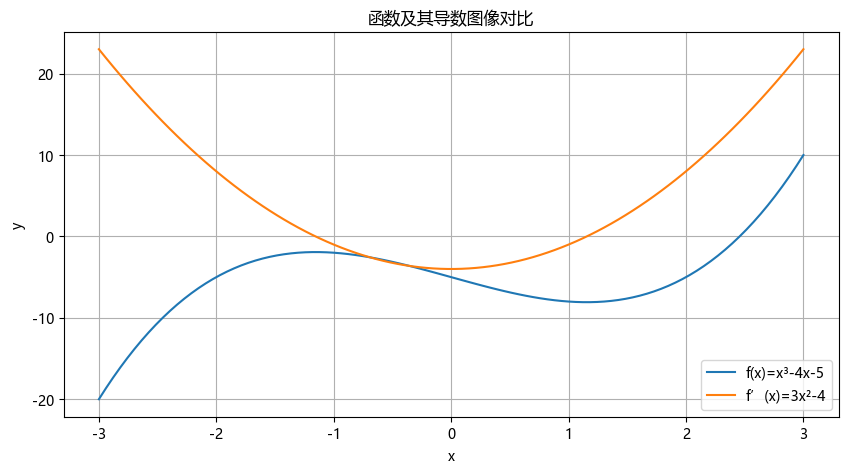

In [11]:
# 生成数据
x_vals = torch.linspace(-3, 3, 100, requires_grad=True)
y_vals = x_vals**3 -4*x_vals -5

# 计算导数
y_sum = y_vals.sum()
y_sum.backward()
dy_dx = x_vals.grad

# 可视化
plt.figure(figsize=(10,5))
plt.plot(x_vals.detach().numpy(), y_vals.detach().numpy(), label='f(x)=x³-4x-5')
plt.plot(x_vals.detach().numpy(), dy_dx.detach().numpy(), label='f’(x)=3x²-4')
plt.xlabel('x'), plt.ylabel('y'), plt.legend(), plt.grid(True)
plt.title("函数及其导数图像对比")
plt.show()
#输出效果：蓝色曲线为原函数，橙色曲线为导数，展示导数的变化趋势（如极值点位置）。

# 二、梯度下降过程可视化
## 1. 单变量梯度下降示例

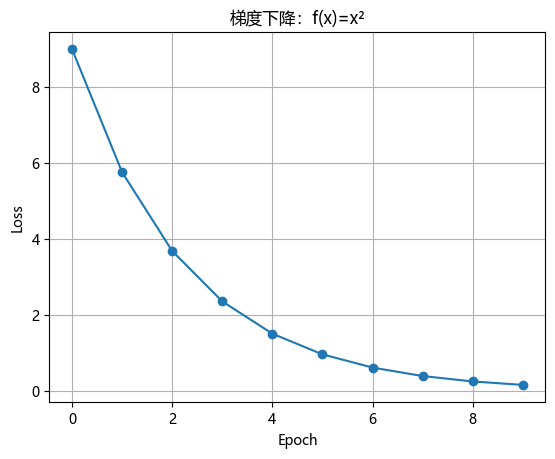

In [15]:
# 目标函数：f(x) = x²
x = torch.tensor(3.0, requires_grad=True)
optimizer = torch.optim.SGD([x], lr=0.1)
loss_history = []

for epoch in range(10):
    optimizer.zero_grad()
    loss = x**2
    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())

# 绘制损失下降曲线
plt.plot(loss_history, marker='o')
plt.xlabel('Epoch'), plt.ylabel('Loss'), plt.title("梯度下降：f(x)=x²")
plt.grid(True)
plt.show()
# 结果：损失值从9逐渐趋近于0，呈指数下降趋势

## 2. 多变量梯度下降（如f(x,y)=x²+y²）
通过类似方法记录参数更新轨迹，可绘制3D曲面图展示优化路径（需引入mpl_toolkits.mplot3d模块）

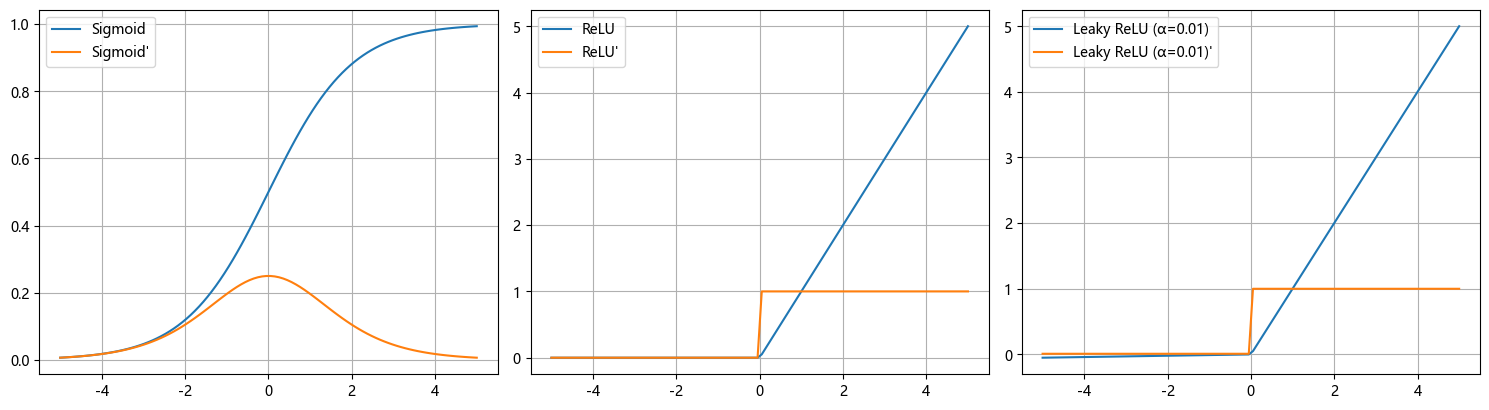

In [16]:
# 定义激活函数
def sigmoid(x): return 1 / (1 + torch.exp(-x))
def relu(x): return torch.maximum(torch.tensor(0), x)
def leaky_relu(x, alpha=0.01): return torch.where(x > 0, x, alpha * x)

x = torch.linspace(-5, 5, 100, requires_grad=True)

# 计算各函数导数
funcs = {
    "Sigmoid": sigmoid(x),
    "ReLU": relu(x),
    "Leaky ReLU (α=0.01)": leaky_relu(x)
}

plt.figure(figsize=(15, 8))
for i, (name, y) in enumerate(funcs.items()):
    y.sum().backward(retain_graph=True)
    grad = x.grad.clone()
    x.grad.zero_()
    
    plt.subplot(2, 3, i+1)
    plt.plot(x.detach(), y.detach(), label=name)
    plt.plot(x.detach(), grad.detach(), label=f"{name}'")
    plt.legend(), plt.grid(True)

plt.tight_layout()
plt.show()

### 图像特性：

Sigmoid：导数在两端趋近0（梯度消失）

ReLU：正区间导数为1，负区间为0（死亡神经元问题）

Leaky ReLU：负区间保留小梯度，缓解神经元死亡
## 2. 激活函数对梯度下降的影响

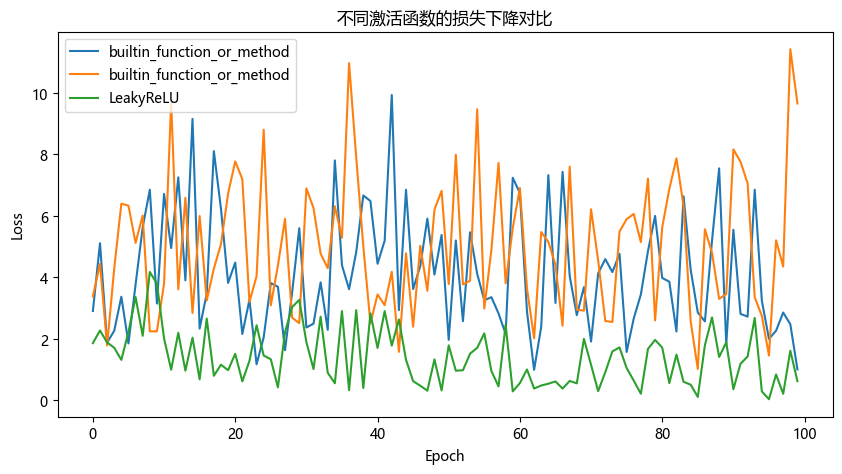

In [26]:
# 对比不同激活函数在简单网络中的收敛速度
activation_modules = [torch.nn.Sigmoid(), torch.nn.ReLU(), torch.nn.LeakyReLU(0.01)]
loss_curves = []

for act in activation_modules:
    model = torch.nn.Sequential(torch.nn.Linear(1, 1), act)
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    losses = []
    
    for _ in range(100):
        inputs = torch.randn(10, 1)
        targets = 2 * inputs + 1
        outputs = model(inputs)
        loss = torch.mean((outputs - targets)**2)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    
    loss_curves.append(losses)

# 绘制对比曲线
plt.figure(figsize=(10,5))
for i, curve in enumerate(loss_curves):
    plt.plot(curve, label=activation_funcs[i].__class__.__name__)
plt.xlabel('Epoch'), plt.ylabel('Loss'), plt.legend()
plt.title("不同激活函数的损失下降对比")
plt.show()

# 结论：ReLU收敛最快，Sigmoid因梯度消失收敛慢，Leaky ReLU表现稳定